# Heart Disease Classification Problem Project

### Link for the dataset: https://archive.ics.uci.edu/ml/datasets/heart+Disease


Attribute Information:

1. (age)
2. (sex) / (1 = male; 0 = female)
3. (cp) / chest pain type
4. (trestbps) / resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) / serum cholestoral in mg/dl
6. (fbs) / fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. (restecg) / resting electrocardiographic results
8. (thalach) / maximum heart rate achieved
9. (exang) / exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) / ST depression induced by exercise relative to rest
11. (slope) / the slope of the peak exercise ST segment
12. (ca) / number of major vessels (0-3)
13. (thal) / 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (num) / the predicted attribute

In [1]:
# Importing libraries we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve

## Loading the data

In [4]:
df = pd.read_csv('D:/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

## EDA (Exploring the data)

In [6]:
# let's see how many of each target class we have
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0, 0.5, 'Disease amount')

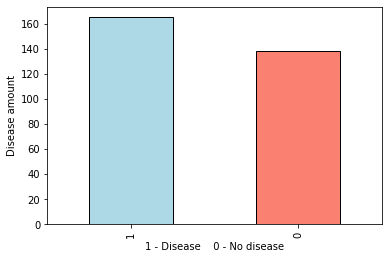

In [7]:
# Visualizing the disease cases amount
df['target'].value_counts().plot(kind='bar',
                                 color=['lightblue', 'salmon'], 
                                 edgecolor='black')
plt.xlabel('1 - Disease    0 - No disease')
plt.ylabel('Disease amount')

## Heart Disease Frequency According to Sex

In [8]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
# Comparing target and sex columns
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Text(0, 0.5, 'Disease amount')

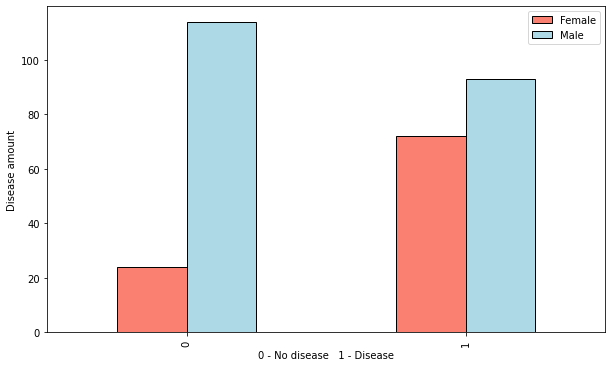

In [10]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                    color=['salmon', 'lightblue'],
                                    edgecolor='black')
plt.legend(['Female', 'Male'])
plt.xlabel('0 - No disease   1 - Disease')
plt.ylabel('Disease amount')

## Age / Max. Heart Rate for Heart Disease

Text(0, 0.5, 'Max. Heart Rate')

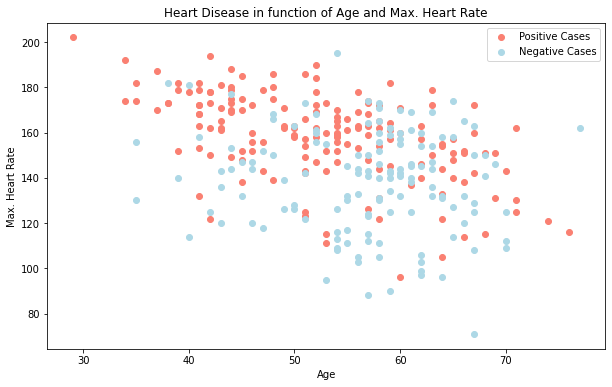

In [11]:
# Scatter plot with positive examples
plt.figure(figsize=(10, 6))
plt.scatter(df['age'][df['target']==1], df['thalach'][df['target']==1], c='salmon')
# Scatter plot with negative examples
plt.scatter(df['age'][df['target']==0], df['thalach'][df['target']==0], c='lightblue')

plt.title('Heart Disease in function of Age and Max. Heart Rate')
plt.legend(['Positive Cases', 'Negative Cases'])
plt.xlabel('Age')
plt.ylabel('Max. Heart Rate')

###  As we can see from the histogram below, most heart disease cases are in the age range from 50 to 60


Text(0, 0.5, 'Disease Amount')

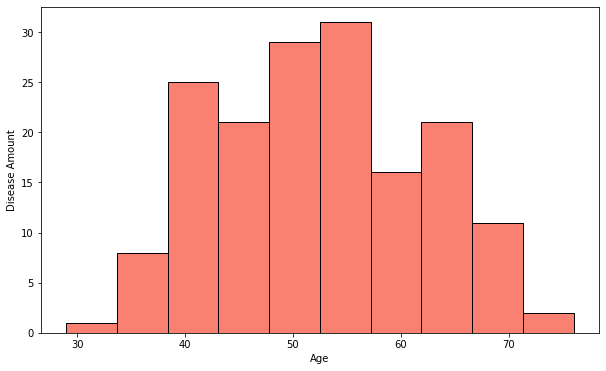

In [12]:
df['age'][df['target']==1].plot.hist(figsize=(10,6), edgecolor='black', color='salmon')
plt.xlabel('Age')
plt.ylabel('Disease Amount')

## Heart Disease Frequency per Chest Pain Type

cp - Chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [13]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


### Patients with "Non-anginal" chest pain type have the biggest amount of disease cases

Text(0, 0.5, 'Disease Amount')

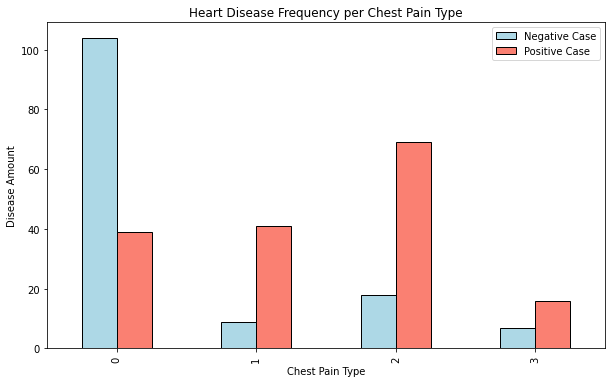

In [14]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar',
                                         figsize=(10, 6),
                                         color=('lightblue', 'salmon'),
                                         edgecolor='black')
plt.legend(['Negative Case', 'Positive Case'])
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Disease Amount')

In [15]:
# Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


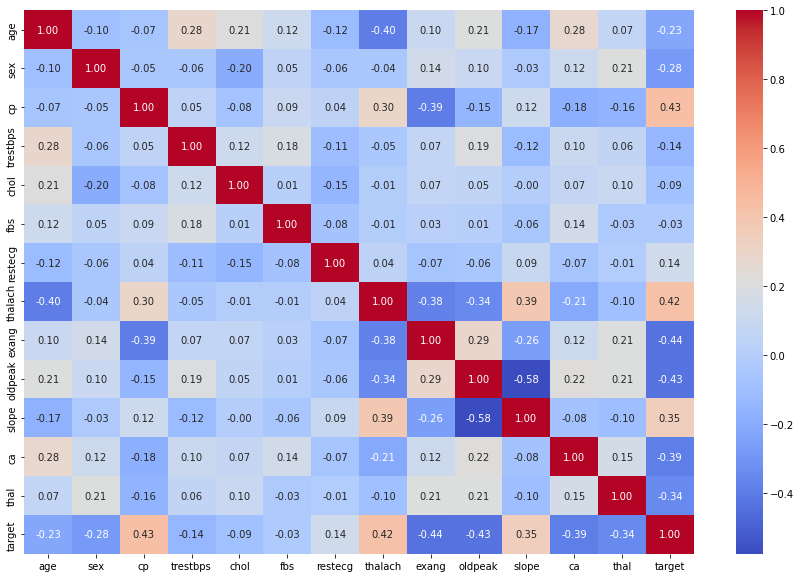

In [16]:
# Visualizing correlation matrix with heatmap
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), 
                 annot=True,
                 fmt='.2f',
                 cmap='coolwarm')

## Modelling

In [17]:
# Splitting data into X and y
X = df.drop('target', axis=1)
y = df['target']

In [18]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
# Splitting data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Now I'm going to try 3 different Machine Learning models for data:

* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [20]:
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Function to fit and score the models
def fit_score(models, X_train, X_test, y_train, y_test):
    # Setting a random seed
    np.random.seed(42)
    # Keeping model scores in dict
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fitting the model to the data
        model.fit(X_train, y_train)
        # Evaluating the model and appending its score to dictionary
        model_scores[name] = model.score(X_test, y_test)
    return model_scores      

In [23]:
import warnings
warnings.filterwarnings("ignore") # Eliminating the warnings

model_scores = fit_score(models=models,
                         X_train=X_train, 
                         X_test=X_test, 
                         y_train=y_train, 
                         y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model score comparison

Text(0, 0.5, 'Score')

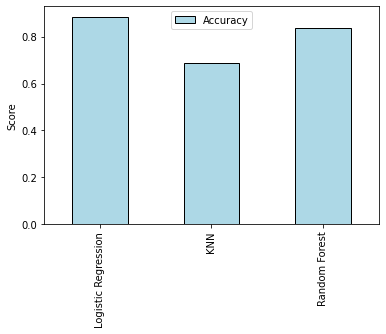

In [24]:
compare = pd.DataFrame(model_scores, index=['Accuracy'])
compare.T.plot.bar(color='lightblue', edgecolor='black')
plt.ylabel('Score')

#### Models gave us next results without the hyperparameter tuning:
* Logistic Regression - 88% accuracy
* KNN - 68% accuracy
* Random Forest - 83% accuracy

#### Next steps are:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

In [25]:
# Tuning KNN
# Let's try different values for 'n_neighbours' 

train_scores = []
test_scores = []

for i in range(1, 26, 3):
    print(f"Trying model with {i} neighbours...")
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    print(f"Model accuracy with {i} neighbours is: {knn.score(X_test, y_test)*100}")
    test_scores.append(knn.score(X_test, y_test))
    train_scores.append(knn.score(X_train, y_train))
    print("")

Trying model with 1 neighbours...
Model accuracy with 1 neighbours is: 62.295081967213115

Trying model with 4 neighbours...
Model accuracy with 4 neighbours is: 67.21311475409836

Trying model with 7 neighbours...
Model accuracy with 7 neighbours is: 70.49180327868852

Trying model with 10 neighbours...
Model accuracy with 10 neighbours is: 70.49180327868852

Trying model with 13 neighbours...
Model accuracy with 13 neighbours is: 73.77049180327869

Trying model with 16 neighbours...
Model accuracy with 16 neighbours is: 72.1311475409836

Trying model with 19 neighbours...
Model accuracy with 19 neighbours is: 70.49180327868852

Trying model with 22 neighbours...
Model accuracy with 22 neighbours is: 72.1311475409836

Trying model with 25 neighbours...
Model accuracy with 25 neighbours is: 70.49180327868852



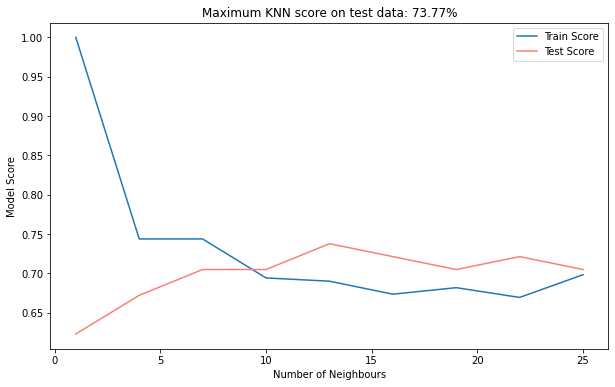

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,26,3), train_scores, label='Train Score')
plt.plot(range(1,26,3), test_scores, label='Test Score', color='salmon')
plt.xlabel('Number of Neighbours')
plt.ylabel('Model Score')
plt.legend()
plt.title(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")
plt.show()

## Tuning hyperparameters with RandomizedSearchCV

Due to KNN model even after tuning showed us worse results than untuned 'Logistic Regression' and 'Random Forest Classifier' models, we'll focus on tuning those last two.

In [27]:
# Hyperparameter grid for Logistic Regression
lr_grid = {'C': np.logspace(-4, 4, 20),
           'solver': ['liblinear']}

# Hyperparameter grid for Random Forest
rf_grid = {'n_estimators': np.arange(10, 2000, 50),
           'max_depth': [None, 3, 5, 10], 
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [28]:
# Tuning Logistic Regression

np.random.seed(42)

log_reg = RandomizedSearchCV(LogisticRegression(),
                             param_distributions=lr_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

# Fitting
log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
# Displaying best hyperparameters
log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
log_reg.score(X_test, y_test)

0.8852459016393442

### Let's do the same for Random Forest model

In [31]:
# Tuning Random Forest Classifier

np.random.seed(42)

ran_for = RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

# Fitting
ran_for.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,   60,  110,  160,  210,  260,  310,  360,  410,  460,  510,
        560,  610,  660,  710,  760,  810,  860,  910,  960, 1010, 1060,
       1110, 1160, 1210, 1260, 1310, 1360, 1410, 1460, 1510, 1560, 1610,
       1660, 1710, 1760, 1810, 1860, 1910, 1960])},
                   verbose=True)

In [32]:
# Displaying best hyperparameters
ran_for.best_params_

{'n_estimators': 1310,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_depth': 3}

### We've got a little improvement but Logistic Regression model is still showing the best result

In [35]:
ran_for.score(X_test, y_test) 

0.8688524590163934

## Tuning hyperparameters with GridSearchCV

In [37]:
# Different hyperparameters for Logistic Regression model
lr_grid = {'C': np.logspace(-4, 4, 40),
           'solver': ['liblinear']}

gs_logreg = GridSearchCV(LogisticRegression(),
                         param_grid=lr_grid,
                         cv=5,
                         verbose=True)

# Fitting
gs_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
gs_logreg.best_params_

{'C': 0.19144819761699575, 'solver': 'liblinear'}

In [40]:
gs_logreg.score(X_test, y_test) # No improvement

0.8852459016393442

## Evaluating tuned Logistic Regression model
* ROC Curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

In [44]:
# Making predictions with tuned model

y_preds = gs_logreg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

<Figure size 720x432 with 0 Axes>

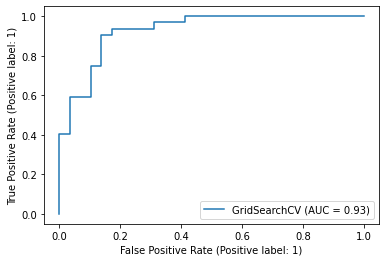

In [46]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_logreg, X_test, y_test)

Text(20.5, 0.5, 'Predicted Label')

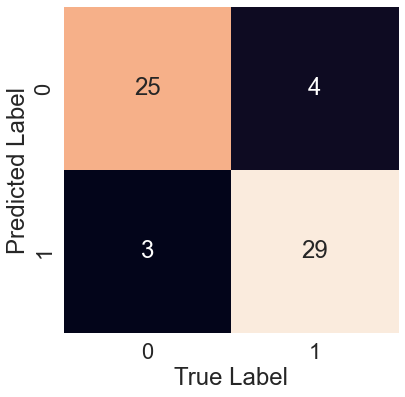

In [58]:
# Confusion matrix
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
            annot=True,
            cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [57]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculating evaluation metrics using cross-validation

In [59]:
# Checking best hyperparameters
gs_logreg.best_params_

{'C': 0.19144819761699575, 'solver': 'liblinear'}

In [60]:
clf = LogisticRegression(C=0.19144819761699575,
                         solver='liblinear')

In [69]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, 
                         X, 
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [72]:
# Mean value from cross-validation score array
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [73]:
# Cross-validated precision
cv_pre = cross_val_score(clf, 
                         X, 
                         y,
                         cv=5,
                         scoring='precision')
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [74]:
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [75]:
# Cross-validated recall
cv_rec = cross_val_score(clf, 
                         X, 
                         y,
                         cv=5,
                         scoring='recall')
cv_rec

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [76]:
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [78]:
# Cross-validated F1 score
cv_f1 = cross_val_score(clf, 
                         X, 
                         y,
                         cv=5,
                         scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [80]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [84]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_pre,
                           'Recall': cv_rec,
                           'F1 Score': cv_f1},
                          index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.844699,0.820794,0.921212,0.867301


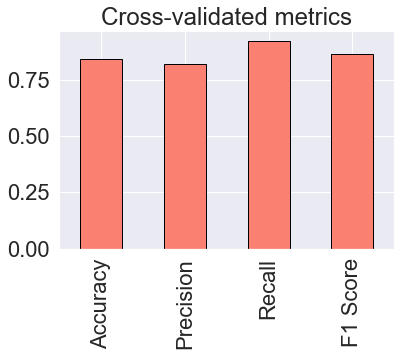

In [90]:
cv_metrics.T.plot.bar(title='Cross-validated metrics', 
                      legend=False, 
                      color='salmon', 
                      edgecolor='black');

## Feature importance

In [92]:
gs_logreg.best_params_

{'C': 0.19144819761699575, 'solver': 'liblinear'}

In [94]:
clf = LogisticRegression(C=0.19144819761699575,
                         solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.19144819761699575, solver='liblinear')

In [96]:
# Checking coef_
clf.coef_

array([[ 0.00289519, -0.83734909,  0.65352832, -0.01156792, -0.00164209,
         0.04176191,  0.30423713,  0.02451658, -0.58988443, -0.56503173,
         0.44063325, -0.62947459, -0.66754621]])

In [97]:
# Matching coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0028951891741162204,
 'sex': -0.837349085210479,
 'cp': 0.6535283244848925,
 'trestbps': -0.011567916399274573,
 'chol': -0.0016420928451171988,
 'fbs': 0.04176191257146454,
 'restecg': 0.3042371275680201,
 'thalach': 0.02451658417514702,
 'exang': -0.589884429012285,
 'oldpeak': -0.5650317272279558,
 'slope': 0.44063325039989765,
 'ca': -0.6294745927704666,
 'thal': -0.6675462120616419}

<AxesSubplot:title={'center':'Feature Importance'}>

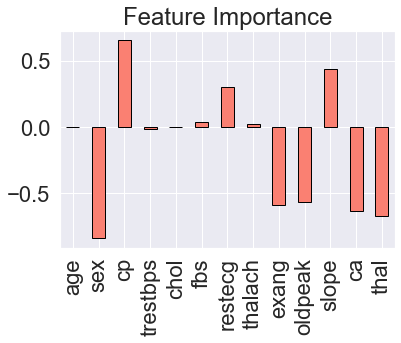

In [104]:
# Visualizing
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', 
                      legend=False, 
                      color='salmon', 
                      edgecolor='black')

### Saving and loading the model

In [105]:
import pickle

pickle.dump(clf, open("heart_disease_classification.pkl", "wb"))

In [106]:
loaded_model = pickle.load(open("heart_disease_classification.pkl", "rb"))

In [107]:
loaded_model.score(X_test, y_test)

0.8852459016393442